In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Wczytanie danych
data = pd.read_csv('C:/Users/kacpe/Downloads/MNIST_data.csv')
target = pd.read_csv('C:/Users/kacpe/Downloads/MNIST_target.csv')

# Wyświetlenie nazw kolumn w ramce danych target
print(target.columns)

# Informacje o klasach
classes = target['column_0'].unique()
num_samples_per_class = target['column_0'].value_counts()

print("Klasy: ", classes)
print("Liczba próbek w zbiorze: ", len(data))
print("Liczba próbek w każdej klasie: ")
print(num_samples_per_class)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Tworzenie i trenowanie modelu regresji logistycznej
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train['column_0'])

# Przewidywanie wyników dla danych testowych
y_pred = model.predict(X_test)

# Obliczenie dokładności modelu
accuracy = accuracy_score(y_test, y_pred)
print('Dokładność modelu: ', accuracy)

# Obliczenie macierzy pomyłek
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Macierz pomyłek:')
print(confusion_matrix)



Index(['column_0'], dtype='object')
Klasy:  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Liczba próbek w zbiorze:  70000
Liczba próbek w każdej klasie: 
1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: column_0, dtype: int64
Dokładność modelu:  0.915
Macierz pomyłek:
[[1287    0    9    3    4   12   15    5   10    4]
 [   0 1536   10    7    1    4    1    2   15    5]
 [  10   21 1250   19   12   13    9   16   42    8]
 [   4    5   35 1272    2   58    7    9   32   10]
 [   4    3    9    4 1223    2   12    9   16   46]
 [  12    5   13   43   18 1105   24    1   43   22]
 [  14    3   17    2   14   16 1328    2   10    1]
 [   6    4   18   12    9    2    1 1378    6   40]
 [   8   20   16   36    6   39    8    3 1235   20]
 [   7    5    2   27   35   15    0   50   11 1196]]


c:\Users\kacpe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Accuracy Score: 0.915')

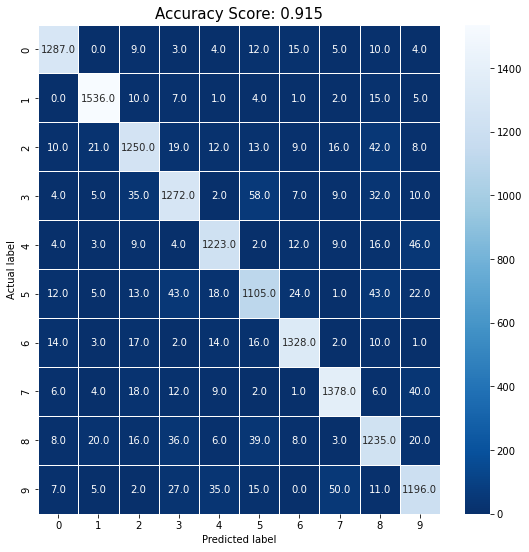

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix,annot=True, fmt='.1f', linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_table = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_table,size=15)